<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignment 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [104]:
# Imports

import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [48]:
# Load Boston Housing Data, Split

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [49]:
# Check shape of train and test data

print(x_train.shape, x_test.shape)

(404, 13) (102, 13)


In [54]:
# Load combined data for feature engineering

b_housing = load_boston()

In [55]:
print(b_housing.data.shape)

(506, 13)


In [89]:
# Convert to dataframe

df = pd.DataFrame(b_housing.data, columns=b_housing.feature_names)

In [90]:
# See df

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [91]:
# New df with target column

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [74]:
# Normalize the Data (all features should have roughly the same scale)

Scaler = MinMaxScaler()

x_train = Scaler.fit_transform(x_train)
y_train = Scaler.fit_transform(x_test)

In [97]:
# Normalize the df, this is after the feature engineering

df_scaled = Scaler.fit_transform(df)

df_scaled = pd.DataFrame(df_scaled, columns=features)

df_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338


In [102]:
# Add target (MEDV) from dataset http://lib.stat.cmu.edu/datasets/boston

df_scaled['MEDV'] = pd.Series(b_housing.target, index=df_scaled.index)

df_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,24.0
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,21.6
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,34.7
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,33.4
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,36.2


In [107]:
# Train Test split the df "engineered" with the target, and consider more feature engineering after first run

features = list(df_scaled)[0:13]
target = list(df_scaled)[13]

X = df_scaled[features]
Y = df_scaled[target]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 10)

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(354, 13) (152, 13) (354,) (152,)


In [108]:
# Instantiate a model object and use model.add() to add layers to your model / or not, because Sequential coding is better

model = Sequential([
    Dense(10, input_shape=(13,), activation='relu'), # Use activation functions that are appropriate for this task
    Dense(10, activation='relu'),
    Dense(1, activation='relu')]) # Since this is a regression model you will have a single output node in the final layer.

In [109]:
# Compile your model

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error']) # Report accuracy in terms of Mean Squared Error

In [111]:
# Fit your model and report its accuracy in terms of Mean Squared Error

#fit_model = model.fit(x_train, y_train, epochs=100, validation_split=.1, verbose=False)

fit_model = model.fit(X_train, Y_train, epochs=100, validation_data=(X_test, Y_test), verbose=False)

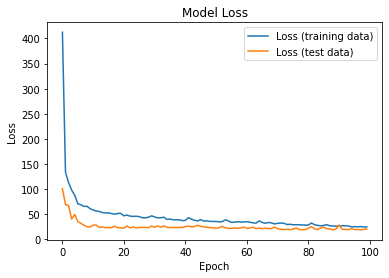

In [ ]:
# Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch

plt.plot(fit_model.history['loss'], label='Loss (training data)')
plt.plot(fit_model.history['val_loss'], label='Loss (test data)')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show();

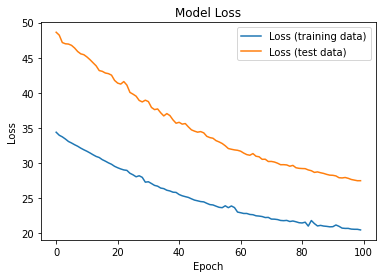

In [112]:
# Use the history object that is returned from engineered model.fit to make graphs of the model's loss or train/validation accuracies by epoch

plt.plot(fit_model.history['loss'], label='Loss (training data)')
plt.plot(fit_model.history['val_loss'], label='Loss (test data)')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show();

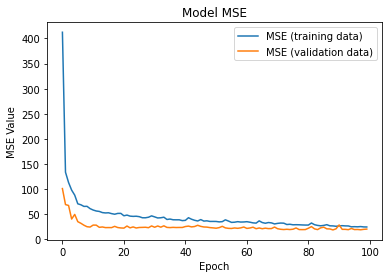

In [ ]:
# Plot history: MSE

plt.plot(fit_model.history['mean_squared_error'], label='MSE (training data)')
plt.plot(fit_model.history['val_mean_squared_error'], label='MSE (validation data)')
plt.title('Model MSE')
plt.ylabel('MSE Value')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show();

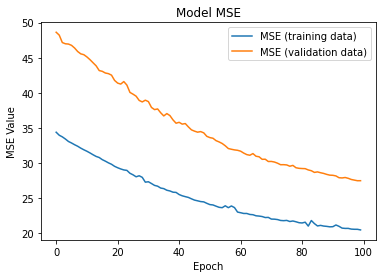

In [113]:
# Engineered Data (with target added) Plot history: MSE

plt.plot(fit_model.history['mean_squared_error'], label='MSE (training data)')
plt.plot(fit_model.history['val_mean_squared_error'], label='MSE (validation data)')
plt.title('Model MSE')
plt.ylabel('MSE Value')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show();

In [116]:
# Sequential Model MSE Score

#score = model.evaluate(x_test, y_test)

# Model MSE: 32.2979


score = model.evaluate(X_test, Y_test)

# Feature Engineered (with target) MSE: 27.4238

# In conclusion, the model (same params) was improved with one more column of data, the target:

# MEDV - Median value of owner-occupied homes in $1000's

5/5 [==============================] - 0s 2ms/step - loss: 27.4238 - mean_squared_error: 27.4238


In [118]:
# Run this same data through a linear regression model. Which achieves higher accuracy?

# Create linear regression object

lr = linear_model.LinearRegression()

#lr.fit(x_train, y_train)

lr.fit(X_train, Y_train)

#y_hat = lr.predict(x_test)

y_hat = lr.predict(X_test)

In [119]:
# Get MSE

#lr_mse = mean_squared_error(y_hat, y_test)

# LR MSE: 23.1955

# LR achieves higher accuracy on first data without engineering, and model

lr_mse = mean_squared_error(y_hat, Y_test)

# LR MSE with target engineering: 29.3265

# LR achieves lower accuracy on the second data with target and engineering, same model params

print("The Mean Square Error for Linear Regression is: ", lr_mse)

The Mean Square Error for Linear Regression is:  29.326596526123257


In [ ]:
# Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)

# Okay, added one more (target) column from the data set which was not yet added:

# MEDV - Median value of owner-occupied homes in $1000's

In [ ]:
# After feature engineering, which model sees a greater accuracy boost due to the new features?

# In conclusion, the NN model (same params) was improved with one more column of data, the target:

# MEDV - Median value of owner-occupied homes in $1000's

# The visualizations also indicate that the NN model would increase performance with more epochs,

# however, I chose to keep this experiment simple for now, and am happy to see the NN model improved.

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- The number of nodes in your output layer should equal the number of classes you want to predict for Fashion-MNIST.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [ ]:
# Imports

from tensorflow.keras.datasets import fashion_mnist
import numpy as np

In [ ]:
# Load MNIST Data

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
# Check shape of train and test data

print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [ ]:
# Count number of category labels to one-hot encode

num_classes = np.unique(y_train, return_counts=True)

num_classes

# 10

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [ ]:
# Instantiate number of classes for one-hot encoding category labels

num_classes = 10

In [ ]:
# Reshape vectors into 1 dimensional arrays from 28x28 dimensional images

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [ ]:
# Convert numpy.ndarray to float

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
# Make sure to one-hot encode your category labels

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [ ]:
# Create Model: The number of nodes in your output layer should equal the number of classes you want to predict for Fashion-MNIST

model = Sequential([
    Dense(10, input_shape=(784,), activation='relu'),
    Dense(10, activation='relu'),
    Dense(10, activation='softmax')])

In [ ]:
# Compile the model

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Model Summary

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fit the model

fit_model = model.fit(x_train, y_train, epochs=100, batch_size=100, validation_split=.1,  verbose=False)

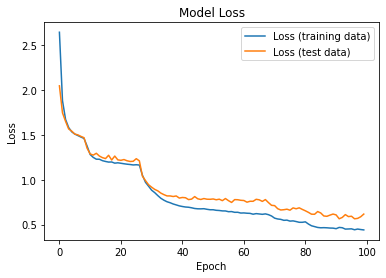

In [ ]:
# Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch

plt.plot(fit_model.history['loss'], label='Loss (training data)')
plt.plot(fit_model.history['val_loss'], label='Loss (test data)')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show();

In [ ]:
# Score

score = model.evaluate(x_test, y_test)

# accuracy: 0.8208

# Try different hyperparameters. What is the highest accuracy that you are able to achieve.

313/313 [==============================] - 1s 2ms/step - loss: 0.6195 - accuracy: 0.8208


In [ ]:
# Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.